# Early Life and Aging Trends and Effects (RELATE)
* Cross-national data that contain information that can be used to examine the effects of early life conditions on older adult health conditions, including heart disease, diabetes, obesity, functionality, mortality, and self-reported health. 
* The complete cross sectional/longitudinal dataset (n=147,278) was compiled from major studies of older adults or households across the world that in most instances are representative of the older adult population either nationally, in major urban centers, or in provinces. 
* It includes over 180 variables with information on demographic and geographic variables along with information about early life conditions and life course events for older adults in low, middle and high income countries. 
* https://www.icpsr.umich.edu/icpsrweb/DSDR/studies/34241/summary 

In [2]:
# basic and visualization tools
import numpy as np
from math import pi
import pandas as pd
import seaborn as sns
import scipy.stats as st
from collections import Counter
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact, interactive, fixed, interact_manual, Layout
import warnings
warnings.filterwarnings('ignore')

# machine leanring 
from sklearn.preprocessing import RobustScaler, MinMaxScaler, QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest

# Select Country-specific data file

In [3]:
data_df=pd.read_csv("BLK_earlyLife_agingTrend.csv")

countryDict = {1: 'China-CLHLS', 3: 'Costa Rica-CRELES', 4: 'Puerto Rico-PREHCO', 5: 'US-WLS', 10: 'China-CHNS', \
               11: 'Argentina-SABE', 12: 'Barbados-SABE', 13: 'Brazil-SABE', 14: 'Chile-SABE', 15: 'Cuba-SABE', \
               16: 'Mexico-SABE', 17: 'Uruguay-SABE', 20: 'India-WHO/SAGE', 21: 'Ghana-WHO/SAGE', 22: 'China-WHO/SAGE', \
               23: 'South Africa-WHO/SAGE', 24: 'Mexico-WHO/SAGE',25: 'Russia-WHO/SAGE'}

data_df["COUNTRY"] = data_df["COUNTRY"].map(countryDict)
countryName = list(countryDict.values())
countryIndex = list(countryDict.keys())

inter_country = widgets.SelectMultiple(options=countryName, value=['China-WHO/SAGE'], description='Country:')
display(inter_country)

A Jupyter Widget

In [4]:
data_df.head()

,ID,SAMPLEWGT,COUNTRY,WAVE,BIRTHCOHORT,BIRTHCOHORTFIN,COHORT,PROXY,TYPEHH_CLHLS,RESIDENCE,...,NCHRONIC,ONECHRONIC,WEIGHT,WAIST,HIP,BMI,BMI_CAT,OBESITY,DEAD,DEADFIN
0,1540,1236.000000,Mexico-SABE,2000,9,4,2,-1,-1,0,...,0,0,93.0,131.0,129.0,43.62920,5,1,-1,-1
1,3323,477.928314,Ghana-WHO/SAGE,200708,15,10,3,0,-1,0,...,0,0,76.0,104.0,106.0,25.57049,4,0,-1,-1
2,11580,4059.384521,China-WHO/SAGE,200708,12,7,2,0,-1,0,...,1,1,65.5,88.0,100.0,24.65279,3,0,-1,-1
3,5593,4556.883789,China-WHO/SAGE,200708,12,7,2,0,-1,1,...,0,0,32.0,64.2,84.4,17.25027,2,0,-1,-1
4,1398,193.000000,Cuba-SABE,2000,9,4,2,-1,-1,0,...,3,1,53.0,87.0,97.0,25.20809,4,0,-1,-1


In [5]:
# df.head()
df_col = data_df.columns
df_row = len(data_df)
print('Number of patients/participants:', df_row)
print('Number of variables:', len(df_col))

Number of patients/participants: 88273
Number of variables: 137


In [6]:
# Check if we have missing value
def checkMissing(df):
    nullValue = df.isnull().sum()
    if nullValue.sum() > 0:
        col = df.columns
        row = len(df)
        nullVariables = []
        nullCount = []
        nullPer = []
        for i in range(0, len(nullValue)):
            if nullValue[i] != 0:
                nullVariables.append(col[i])
                nullCount.append(nullValue[i])
                nullPer.append(nullValue[i]/row*100)
        nullSum = pd.DataFrame.from_records([nullVariables, nullCount, nullPer]).transpose()
        nullSum.columns = ['Variable', 'Count', 'Missing(%)']
    else:
        nullSum = 'No missing values'
    return nullSum
checkMissing(data_df)

,Variable,Count,Missing(%)
0,SAMPLEWGT,17053,19.3185
1,AGE,3202,3.62738
2,YEDUCA,8817,9.98833
3,INCOME,11525,13.0561
4,PPP,11525,13.0561
5,SIBLINGS,60983,69.0845
6,CHILDREN,47025,53.2722
7,HHSIZE,5311,6.01656
8,IMR_PR,85588,96.9583
9,IMR,4511,5.11028


# Correlation Matrix

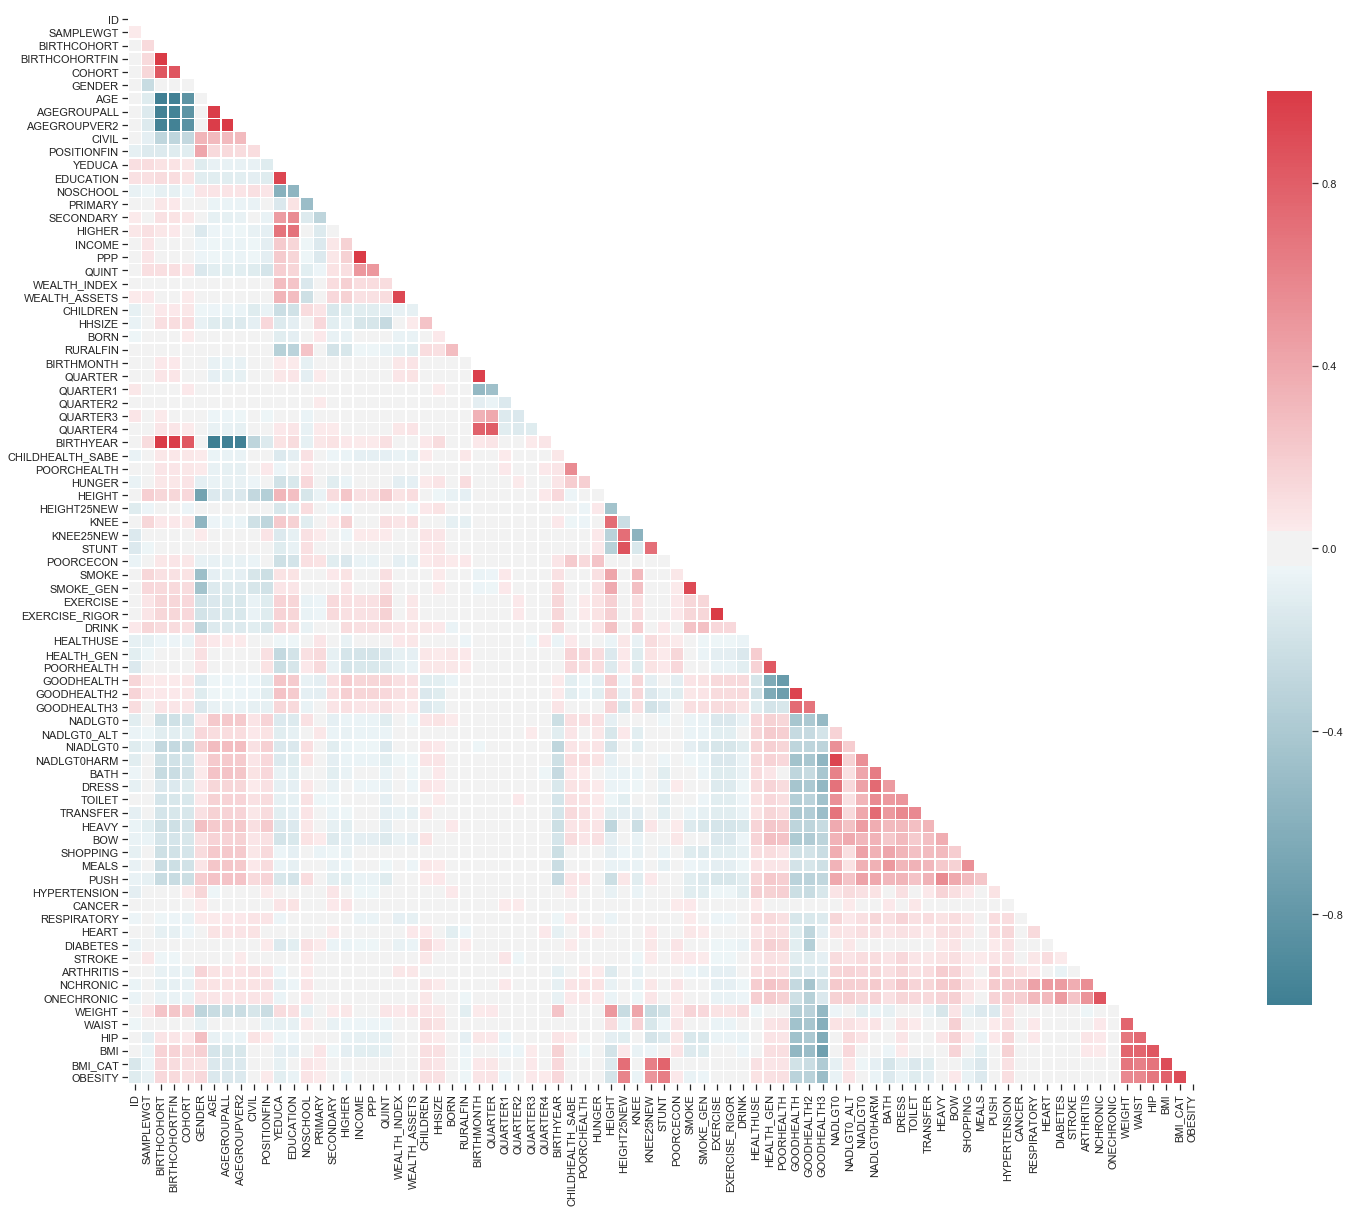

In [7]:
# Try correlation comutation again.
sns.set(style="ticks")
selected_df = data_df[data_df['COUNTRY']==inter_country.value[0]]
corr = selected_df.corr()
corr = corr.dropna(how='all', axis='columns')
corr = corr.dropna(how='all')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(24, 21))

# Generate a custom diverging colormap
sns.set(style='white')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": 0.8})
plt.show()

In [8]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

p1 = figure(title="Distribution of GOODHEALTH",tools="save")
hist, edges = np.histogram(selected_df.GOODHEALTH2.dropna())
p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#033649")
p1.xaxis.axis_label = 'x'
p1.yaxis.axis_label = 'Pr(x)'
show(gridplot(p1,ncols = 2, plot_width=400, plot_height=400, toolbar_location=None))

Loading BokehJS ...

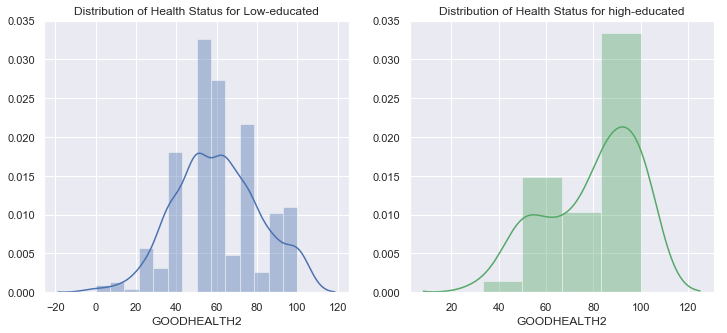

In [10]:
sns.set()
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(selected_df[(selected_df.EDUCATION == 1)].GOODHEALTH2.dropna(),ax=ax)
ax.set_title('Distribution of Health Status for Low-educated')
ax.set_ylim(0,0.035)

ax=f.add_subplot(122)
sns.distplot(selected_df[(selected_df.EDUCATION == 4)].GOODHEALTH2.dropna(),color='g',ax=ax)
ax.set_title('Distribution of Health Status for high-educated')
# ax.set_ylim(0,0.035)
plt.show()

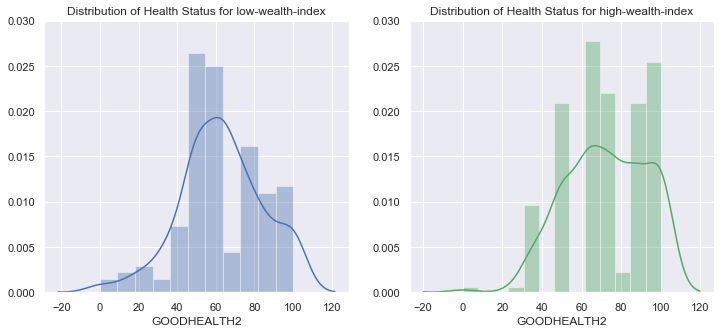

In [12]:
sns.set()
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(selected_df[(selected_df.WEALTH_INDEX == 1)].GOODHEALTH2.dropna(),ax=ax)
ax.set_title('Distribution of Health Status for low-wealth-index')
ax.set_ylim(0,0.03)

ax=f.add_subplot(122)
sns.distplot(selected_df[(selected_df.WEALTH_INDEX == 3)].GOODHEALTH2.dropna(),color='g',ax=ax)
ax.set_title('Distribution of Health Status for high-wealth-index')
ax.set_ylim(0,0.03)

plt.show()

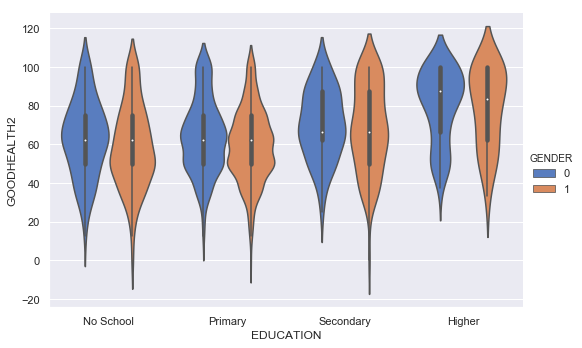

In [13]:
sns.set()
pic_sex = sns.catplot(x="EDUCATION", y="GOODHEALTH2", hue="GENDER", kind="violin", \
                      data=selected_df[selected_df["EDUCATION"] != -1], palette = 'muted', aspect=1.5)
pic_sex.set_xticklabels(["No School", "Primary", "Secondary", "Higher"])
plt.show()

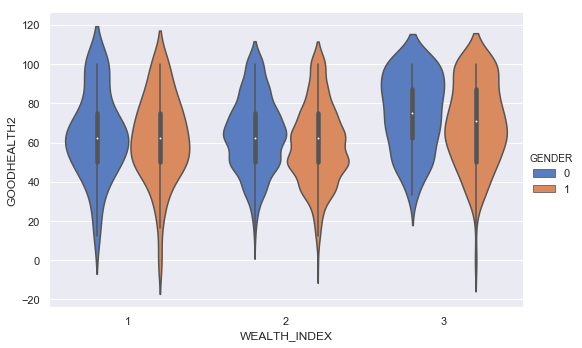

In [14]:
sns.set()
pic_sex = sns.catplot(x="WEALTH_INDEX", y="GOODHEALTH2", hue="GENDER", kind="violin", \
                      data=selected_df[selected_df["WEALTH_INDEX"] != -1], palette = 'muted', aspect=1.5)
plt.show()

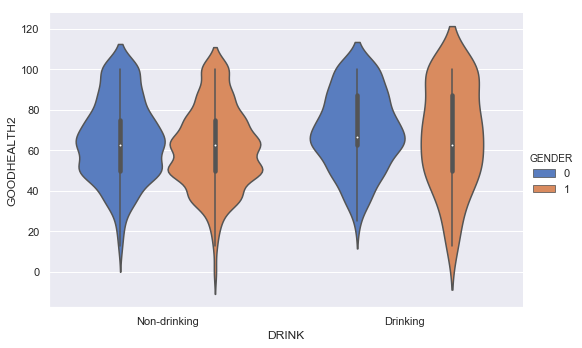

In [15]:
sns.set()
pic_sex = sns.catplot(x="DRINK", y="GOODHEALTH2", hue="GENDER", kind="violin", \
                      data=selected_df[selected_df["DRINK"] != -1], palette = 'muted', aspect=1.5)
pic_sex.set_xticklabels(["Non-drinking", "Drinking"])
plt.show()

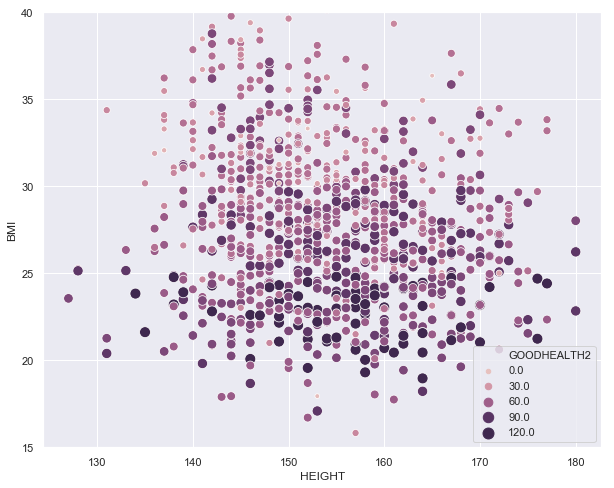

In [16]:
sns.set()
plt.figure(figsize=(10,8))
cmap = sns.cubehelix_palette(dark=.2, light=0.8, as_cmap=True)
ax = sns.scatterplot(x="HEIGHT", y="BMI",
                     hue="GOODHEALTH2", size='GOODHEALTH2',
                     palette=cmap, sizes=(20, 120),hue_norm=(10, 100),size_norm=(10,100),
                     data=selected_df)
ax.set_ylim(15,40)
plt.show()

# Feature selection

In [17]:
target = selected_df.GOODHEALTH2
checkMissing(selected_df)

,Variable,Count,Missing(%)
0,YEDUCA,13,1.0425
1,SIBLINGS,1247,100
2,CHILDREN,3,0.240577
3,IMR_PR,1247,100
4,HEIGHT,203,16.2791
5,KNEE,184,14.7554
6,GOODHEALTH,2,0.160385
7,GOODHEALTH2,1,0.0801925
8,WEIGHT,204,16.3593
9,WAIST,204,16.3593


In [18]:
features = selected_df.drop(['ID', 'COUNTRY', 'SIBLINGS', 'IMR_PR'], axis='columns')
features = features.dropna(subset=['CHILDREN', 'YEDUCA', 'HEIGHT', 'HIP', 'BMI'])
checkMissing(features)

'No missing values'

In [19]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(features)
sup = sel.get_support()
reduced_features = features[features.columns[sup]]

In [20]:
# Feature Selection/ranking
from sklearn.feature_selection import f_regression, SelectKBest, VarianceThreshold, mutual_info_classif, chi2, f_classif

def rankFeatures(featuresToRank, target, p):
    try: 
        featInput = featuresToRank.drop(['GOODHEALTH2'], axis = 1)
    except:
        featInput = featuresToRank

    reduction = SelectKBest(f_regression, k='all') # VarianceThreshold, mutual_info_regression
    #selector reduction
    reduction.fit(featInput,target)
    importances = reduction.scores_ 
    pvalue = reduction.pvalues_
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    new_order_feature = []
    for f in range(featInput.shape[1]): 
        if p is True:
            print("%d. feature %d %s (%f %f)" % (f + 1, indices[f], featInput.columns[indices[f]], importances[indices[f]], pvalue[f]))
        new_order_feature.append(featInput.columns[indices[f]])
    return new_order_feature

new_order_feature = rankFeatures(reduced_features, reduced_features.GOODHEALTH2, True)

Feature ranking:
1. feature 44 GOODHEALTH (7953.354576 0.218301)
2. feature 43 POORHEALTH (1205.915807 0.644572)
3. feature 45 GOODHEALTH3 (885.049335 0.719771)
4. feature 42 HEALTH_GEN (677.546675 0.773653)
5. feature 60 BMI_CAT (394.452755 0.000179)
6. feature 59 BMI (321.879560 0.535631)
7. feature 61 OBESITY (291.318033 0.497089)
8. feature 57 WAIST (214.502028 0.606834)
9. feature 58 HIP (194.770004 0.090233)
10. feature 54 NCHRONIC (168.952341 0.011036)
11. feature 49 BOW (144.003864 0.000000)
12. feature 52 DIABETES (142.230376 0.000000)
13. feature 56 WEIGHT (119.030102 0.003704)
14. feature 55 ONECHRONIC (95.606196 0.000447)
15. feature 51 HYPERTENSION (77.929186 0.000000)
16. feature 50 PUSH (76.324281 0.000000)
17. feature 10 YEDUCA (67.126169 0.000000)
18. feature 46 NADLGT0_ALT (65.548733 0.006007)
19. feature 48 HEAVY (65.229374 0.034435)
20. feature 47 NIADLGT0 (64.829978 0.000004)
21. feature 11 EDUCATION (55.120992 0.000150)
22. feature 31 HEIGHT (31.903169 0.995925)
2

In [21]:
remove = ['GOODHEALTH', 'GOODHEALTH3', 'HEALTH_GEN', 'POORHEALTH']
reduced_features = reduced_features.drop(remove, axis=1)
feature_rank = [i for i in new_order_feature if (i not in remove)]

In [22]:
# Prediction - Machine Learning

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [24]:
features_ML = reduced_features.drop(['GOODHEALTH2'], axis = 1)
target = reduced_features.GOODHEALTH2

x_train,x_test,y_train,y_test = train_test_split(features_ML,target, random_state = 0)
LR_model = LinearRegression()
LR_model.fit(x_train,y_train)

y_train_pred = LR_model.predict(x_train)
y_test_pred = LR_model.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,y_train_pred),
mean_squared_error(y_test,y_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,y_train_pred),
r2_score(y_test,y_test_pred)))

MSE train data: 152.075, MSE test data: 148.891
R2 train data: 0.597, R2 test data: 0.559


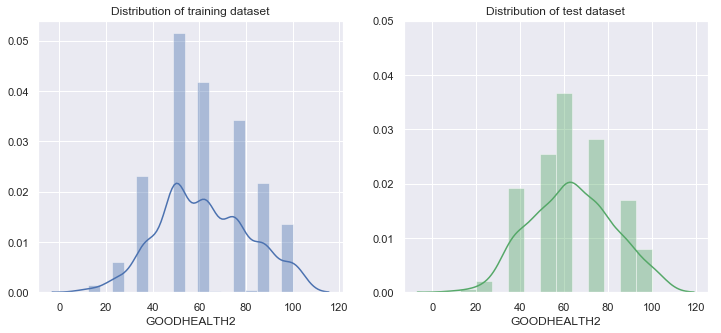

In [25]:
# How train, test dataset distributed
sns.set()
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(y_train,ax=ax)
ax.set_title('Distribution of training dataset')

ax=f.add_subplot(122)
sns.distplot(y_test,color='g',ax=ax)
ax.set_title('Distribution of test dataset')
ax.set_ylim(0,0.05)
plt.show()

In [26]:
# Normalization
quad = PolynomialFeatures (degree = 2)
features_quad = quad.fit_transform(features_ML)
features_ML_quad = pd.DataFrame(features_quad, columns=quad.get_feature_names(features_ML.columns))

MMscaler = MinMaxScaler()
features_ML_minmax = MMscaler.fit_transform(features_ML)
features_ML_minmax = pd.DataFrame(features_ML_minmax, columns=features_ML.columns)

Roscaler = RobustScaler()
features_ML_robust = Roscaler.fit_transform(features_ML)
features_ML_robust = pd.DataFrame(features_ML_robust, columns=features_ML.columns)

x_train,x_test,y_train,y_test = train_test_split(features_ML_quad, target, random_state = 0)
# features_ML_quad[rank_features_ML_quad[3:500]]
nLR = LinearRegression().fit(x_train,y_train)

y_test_pred = nLR.predict(x_test)
print(nLR.score(x_test,y_test))

-4.83745619018


In [27]:
RF_model = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1)#, max_depth=6)
RF_model.fit(x_train,y_train)
RF_model_train_pred = RF_model.predict(x_train)
RF_model_test_pred = RF_model.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,RF_model_train_pred),
mean_squared_error(y_test,RF_model_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,RF_model_train_pred),
r2_score(y_test,RF_model_test_pred)))

MSE train data: 25.215, MSE test data: 160.470
R2 train data: 0.933, R2 test data: 0.525


# More features = more accurate??

Feature ranking:


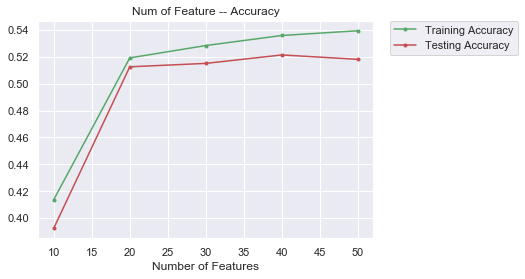

In [28]:
# RobustScaler
numFea = []
acc_train = []
acc_test = []
scoreFea = []

rank_features_ML_robust = rankFeatures(features_ML_robust, reduced_features.GOODHEALTH2, False)

for i in range(10, len(rank_features_ML_robust)+1, 10):
    numFea.append(i)
    x_train,x_test,y_train,y_test = train_test_split(features_ML_robust[rank_features_ML_robust[3:i]], target, random_state = 0)
    LR_model.fit(x_train,y_train)
    model_train_pred = LR_model.predict(x_train)
    model_test_pred = LR_model.predict(x_test)
    acc_train.append(r2_score(y_train,model_train_pred))
    acc_test.append(r2_score(y_test,model_test_pred))
    
plt.figure()
plt.grid(True)
plt.title('Num of Feature -- Accuracy')
plt.xlabel("Number of Features")
plt.plot(numFea, acc_train, '.-', color="g", label="Training Accuracy")
plt.plot(numFea, acc_test, '.-', color="r", label="Testing Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()    

Feature ranking:


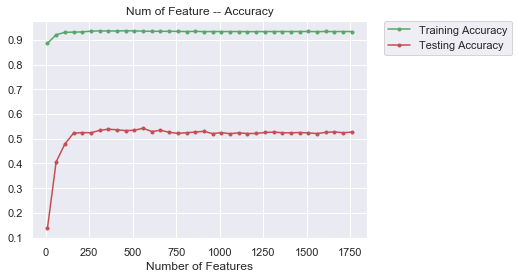

In [29]:
# PolynomialFeatures
numFea = []
acc_train = []
acc_test = []
scoreFea = []

rank_features_ML_quad = rankFeatures(features_ML_quad, reduced_features.GOODHEALTH2, False)

for i in range(10, len(rank_features_ML_quad)+1, 50):
    numFea.append(i)
    x_train,x_test,y_train,y_test = train_test_split(features_ML_quad[rank_features_ML_quad[3:i]], target, random_state = 0)
    RF_model.fit(x_train,y_train)
    RF_model_train_pred = RF_model.predict(x_train)
    RF_model_test_pred = RF_model.predict(x_test)
    acc_train.append(r2_score(y_train,RF_model_train_pred))
    acc_test.append(r2_score(y_test,RF_model_test_pred))
    
plt.figure()
plt.grid(True)
plt.title('Num of Feature -- Accuracy')
plt.xlabel("Number of Features")
plt.plot(numFea, acc_train, '.-', color="g", label="Training Accuracy")
plt.plot(numFea, acc_test, '.-', color="r", label="Testing Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()    